Instructions :
Using the Mental Health dataset and what you have learn this week, answer the following questions :

What is the distribution of mental health conditions among different age groups in the tech industry?
How does the frequency of mental health issues vary by gender?
Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv(r'/content/survey.csv')

In [51]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [52]:
df.shape

(1259, 27)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [55]:
df = df.drop(['comments'], axis = 1)

In [56]:
df.drop_duplicates()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [57]:
df.rename(columns={'Timestamp':'date'}, inplace=True)


In [59]:
df.date = pd.to_datetime(df['date']).dt.normalize()

In [60]:
df.rename(columns={'Age':'age','Country':'country','Gender':'gender'}, inplace=True)

In [61]:
df

,date,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [62]:
df.age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: age, dtype: float64

In [63]:
df.age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

<Axes: xlabel='age', ylabel='count'>

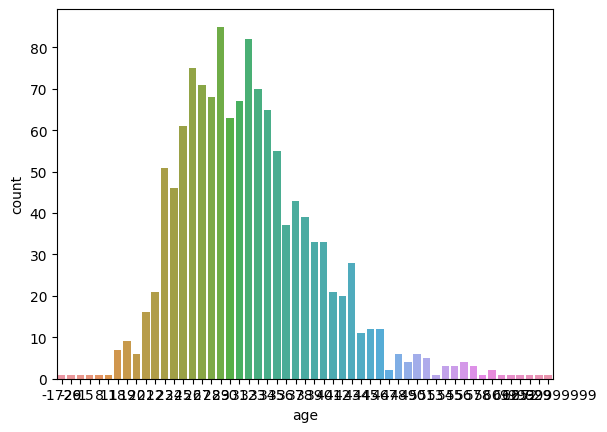

In [82]:
plt.figsize = (3,28)
sns.countplot(x=df['age'])

In [94]:
df = df[df['age'] >= 18]
df = df[df['age'] < 80]

In [96]:
df.age.describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64

In [98]:
df.gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [129]:
df['gender'] = df.gender.replace({
    'Female':'female',
    'M':'male',
    'Male':'male',
    'male':'male',
    'female':'female',
    'm':'male',
    'Male-ish':'other',
    'maile':'male',
    'Trans-female':'other',
    'Cis Female':'female',
    'F':'female',
    'something kinda male?':'other',
    'Cis Male':'other',
    'Woman':'female',
    'f':'female',
    'Mal':'male',
    'Male (CIS)':'male',
    'queer/she/they':'other',
    'non-binary':'other',
    'Femake':'female',
    'woman':'female',
    'Make':'male',
    'Nah':'other',
    'Enby':'other',
    'fluid':'other',
    'Genderqueer':'other',
    'Female ':'female',
    'Androgyne':'other',
    'Agender':'other',
    'cis-female/femme':'female',
    'Guy (-ish) ^_^':'other',
    'male leaning androgynous':'other',
    'Male ':'male',
    'Man':'male',
    'Trans woman':'other',
    'msle':'male',
    'Neuter':'other',
    'Female (trans)':'other',
    'queer':'other',
    'Female (cis)':'female',
    'Mail':'male',
    'cis male':'male',
    'Malr':'male',
    'femail':'female',
    'Cis Man':'male',
    'ostensibly male, unsure what that really means':'other'
})

In [130]:
df.gender.unique()

array(['female', 'male', 'other'], dtype=object)

In [105]:
df.country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [108]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       1251 non-null   datetime64[ns]
 1   age                        1251 non-null   int64         
 2   gender                     1251 non-null   object        
 3   country                    1251 non-null   object        
 4   state                      738 non-null    object        
 5   self_employed              1233 non-null   object        
 6   family_history             1251 non-null   object        
 7   treatment                  1251 non-null   object        
 8   work_interfere             989 non-null    object        
 9   no_employees               1251 non-null   object        
 10  remote_work                1251 non-null   object        
 11  tech_company               1251 non-null   object        
 12  benefi

In [109]:
df = df.drop(['state'], axis = 1)

In [147]:
df.work_interfere.mode()

0    Sometimes
Name: work_interfere, dtype: object

In [151]:
df['work_interfere'] = df['work_interfere'].fillna('Sometimes')

In [154]:
df.self_employed.mode()

0    No
Name: self_employed, dtype: object

In [155]:
df['self_employed'] = df['self_employed'].fillna('No')

In [152]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       1251 non-null   datetime64[ns]
 1   age                        1251 non-null   int64         
 2   gender                     1251 non-null   object        
 3   country                    1251 non-null   object        
 4   self_employed              1251 non-null   object        
 5   family_history             1251 non-null   object        
 6   treatment                  1251 non-null   object        
 7   work_interfere             1251 non-null   object        
 8   no_employees               1251 non-null   object        
 9   remote_work                1251 non-null   object        
 10  tech_company               1251 non-null   object        
 11  benefits                   1251 non-null   object        
 12  care_o

## What is the distribution of mental health conditions among different age groups in the tech industry?

<Axes: xlabel='age', ylabel='Count'>

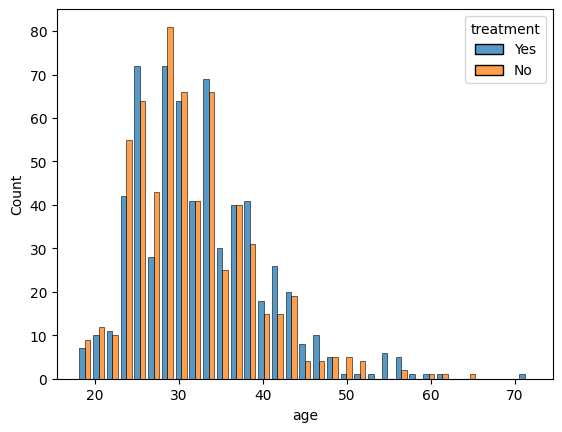

In [127]:
sns.histplot(data=df, x="age", hue="treatment", multiple="dodge", shrink=.8)

In [157]:
positive_treatment = df[df['treatment']== 'Yes']
negative_treatment = df[df['treatment']== 'No']

<Axes: xlabel='age'>

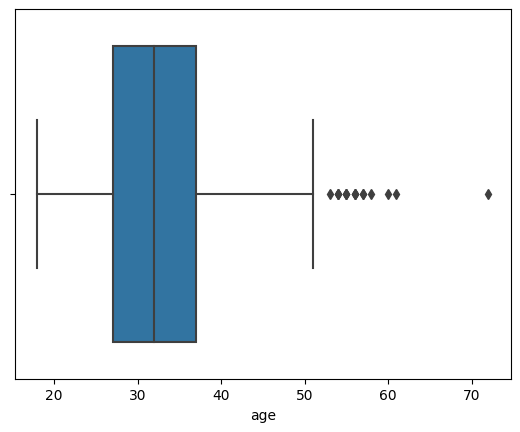

In [128]:
sns.boxplot(x=positive_treatment["age"])

## How does the frequency of mental health issues vary by gender?

<Axes: xlabel='gender', ylabel='count'>

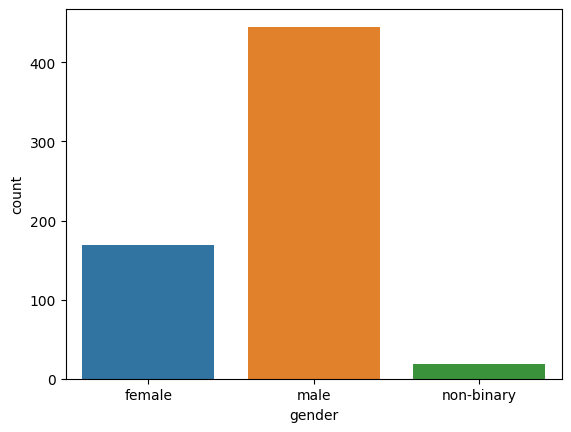

In [133]:
sns.countplot(x=positive_treatment['gender'])

## Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

In [207]:
country_count = df.country.value_counts()

In [208]:
selected_countries = country_count[country_count >= 8].index

In [209]:
filtered_df = df[df['country'].isin(selected_countries)]

In [210]:
df_yes = filtered_df.query("treatment == 'Yes'").groupby(['country', 'treatment']).agg({'gender':'count'})
df_no = filtered_df.query("treatment == 'No'").groupby(['country', 'treatment']).agg({'gender':'count'})

In [211]:
full_df = df_yes.merge(df_no, how = 'outer', on = 'country')

In [212]:
full_df.fillna(value=0, inplace=True)


In [213]:
full_df.rename(columns={'gender_x':'yes', 'gender_y':'no'}, inplace=True)

In [214]:
full_df['yes_percent'] = full_df.yes/(full_df.yes + full_df.no)*100

In [215]:
full_df.sort_values(by='yes_percent', ascending=False)

,yes,no,yes_percent
country,,,
New Zealand,5,3,62.500000
Australia,13,8,61.904762
United States,408,338,54.691689
Canada,37,35,51.388889
United Kingdom,92,92,50.000000
Ireland,13,14,48.148148
Germany,21,24,46.666667
Netherlands,9,18,33.333333
India,3,7,30.000000
